In [1]:
import networkx as nx
from custom import custom_funcs as cf
from networkx.algorithms import bipartite
from circos import CircosPlot
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Introduction

Bipartite graphs are graphs that have two (bi-) partitions (-partite) of nodes. Nodes within each partition are not allowed to be connected to one another; rather, they can only be connected to nodes in the other partition.

Bipartite graphs can be useful for modelling relations between two sets of entities. We will explore the construction and analysis of bipartite graphs here.

![bipartite graph](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Simple-bipartite-graph.svg/600px-Simple-bipartite-graph.svg.png)

Let's load a [crime data](http://konect.uni-koblenz.de/networks/moreno_crime) bipartite graph and quickly explore it.

In [2]:
G = cf.load_crime_network()
G.edges(data=True)[0:5]

[('p687', 'c442', {'role': 'Witness'}),
 ('c435', 'p430', {'role': 'Suspect'}),
 ('c435', 'p720', {'role': 'Suspect'}),
 ('c435', 'p516', {'role': 'Suspect'}),
 ('c435', 'p719', {'role': 'Suspect'})]

In [3]:
G.nodes(data=True)[0:10]

[('p687', {'bipartite': 'person', 'gender': 0}),
 ('c435', {'bipartite': 'crime'}),
 ('p784', {'bipartite': 'person', 'gender': 1}),
 ('c466', {'bipartite': 'crime'}),
 ('p435', {'bipartite': 'person', 'gender': 0}),
 ('p186', {'bipartite': 'person', 'gender': 0}),
 ('p611', {'bipartite': 'person', 'gender': 1}),
 ('p717', {'bipartite': 'person', 'gender': 1}),
 ('c54', {'bipartite': 'crime'}),
 ('c364', {'bipartite': 'crime'})]

## Projections

Bipartite graphs can be projected down to one of the projections. For example, we can generate a person-person graph from the person-crime graph, by declaring that two nodes that share a crime node are in fact joined by an edge.

In [4]:
person_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'person']
pG = bipartite.projection.projected_graph(G, person_nodes)
pG.nodes(data=True)[0:5]

[('p687', {'bipartite': 'person', 'gender': 0}),
 ('p459', {'bipartite': 'person', 'gender': 1}),
 ('p784', {'bipartite': 'person', 'gender': 1}),
 ('p435', {'bipartite': 'person', 'gender': 0}),
 ('p186', {'bipartite': 'person', 'gender': 0})]

### Exercise

Try visualizing the person-person crime network by using a Circos plot. Ensure that the nodes are grouped by gender and then by number of connections.

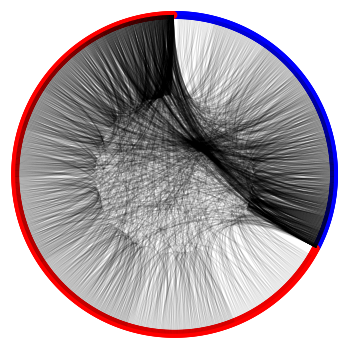

In [30]:
nodes = sorted(pG.nodes(), key=lambda x: (pG.node[x]['gender'], len(pG.neighbors(x))))
edges = pG.edges()
edgeprops = dict(alpha=0.1)
node_cmap = {0:'blue', 1:'red'}
nodecolor = [node_cmap[pG.node[n]['gender']] for n in nodes]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig, edgeprops=edgeprops, nodecolor=nodecolor)
c.draw()
c.fig.savefig('images/crime-person.png', dpi=300)

In [15]:
fig.axes

[]

### Exercise

Use a similar logic to extract crime links.

In [26]:
crime_nodes = [n for n in G.nodes() if G.node[n]['bipartite'] == 'crime']
cG = bipartite.projection.projected_graph(G, crime_nodes)

### Exercise

Can you plot how the crimes are connected, using a Circos plot? Try ordering it by number of connections.

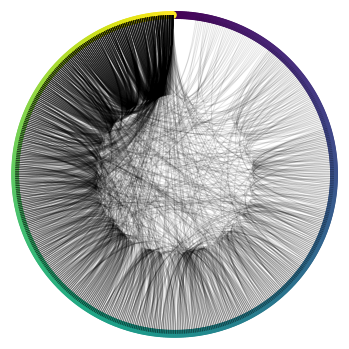

In [31]:
nodes = sorted(cG.nodes(), key=lambda x: len(cG.neighbors(x)))
edges = cG.edges()
edgeprops = dict(alpha=0.1)
nodecolor = plt.cm.viridis(np.arange(len(nodes)) / len(nodes)) 

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig, edgeprops=edgeprops, nodecolor=nodecolor)
c.draw()
plt.savefig('images/crime-crime.png', dpi=300)

### Exercise

NetworkX also implements centrality measures for bipartite graphs, which allows you to obtain their metrics without first converting to a particular projection. This is useful for exploratory data analysis. 

Try the following challenges, referring to the [API documentation](https://networkx.github.io/documentation/networkx-1.9/reference/algorithms.bipartite.html) to help you:

1. Which crimes have the most number of people involved?
1. Which people are involved in the most number of crimes?

In [73]:
# Degree Centrality
bipartite.degree_centrality(G, person_nodes)

{'p262': 0.0018148820326678765,
 'c159': 0.0012062726176115801,
 'p615': 0.0018148820326678765,
 'p324': 0.0018148820326678765,
 'c281': 0.0012062726176115801,
 'c353': 0.00361881785283474,
 'p492': 0.0018148820326678765,
 'p47': 0.0018148820326678765,
 'c397': 0.0024125452352231603,
 'p108': 0.010889292196007259,
 'c398': 0.00361881785283474,
 'c41': 0.00361881785283474,
 'c284': 0.00361881785283474,
 'c380': 0.00361881785283474,
 'c169': 0.00723763570566948,
 'p716': 0.0018148820326678765,
 'p514': 0.019963702359346643,
 'c201': 0.0012062726176115801,
 'p305': 0.003629764065335753,
 'c510': 0.0012062726176115801,
 'c301': 0.0048250904704463205,
 'p592': 0.016333938294010888,
 'p416': 0.0018148820326678765,
 'p790': 0.0018148820326678765,
 'p72': 0.0018148820326678765,
 'p618': 0.0018148820326678765,
 'p687': 0.0018148820326678765,
 'c483': 0.0012062726176115801,
 'p137': 0.0018148820326678765,
 'p516': 0.0018148820326678765,
 'p534': 0.0018148820326678765,
 'p289': 0.0018148820326678

In [74]:
bipartite.degree_centrality(G, crime_nodes)

{'p262': 0.0018148820326678765,
 'c159': 0.0012062726176115801,
 'p615': 0.0018148820326678765,
 'p324': 0.0018148820326678765,
 'p649': 0.003629764065335753,
 'c353': 0.00361881785283474,
 'p492': 0.0018148820326678765,
 'p47': 0.0018148820326678765,
 'c397': 0.0024125452352231603,
 'p108': 0.010889292196007259,
 'c398': 0.00361881785283474,
 'c41': 0.00361881785283474,
 'c284': 0.00361881785283474,
 'c380': 0.00361881785283474,
 'c169': 0.00723763570566948,
 'p716': 0.0018148820326678765,
 'p514': 0.019963702359346643,
 'c201': 0.0012062726176115801,
 'p305': 0.003629764065335753,
 'c510': 0.0012062726176115801,
 'c301': 0.0048250904704463205,
 'p592': 0.016333938294010888,
 'p416': 0.0018148820326678765,
 'p790': 0.0018148820326678765,
 'p72': 0.0018148820326678765,
 'p618': 0.0018148820326678765,
 'p687': 0.0018148820326678765,
 'c69': 0.0024125452352231603,
 'p163': 0.0018148820326678765,
 'p534': 0.0018148820326678765,
 'p289': 0.0018148820326678765,
 'c511': 0.002412545235223160